In [1]:
import numpy as np

The purpose of this notebook is to fit the commute distance distribution of Delhi NCT to a kernel of the form

$$
f(d) = \frac{1}{1 + (d/a)^b}.
$$

What this means that we wish to find parameters $a$ and $b$ such that $f(d)$ is a close approximation to the fraction of the population in Mumbai **which travels distance $d$ or more**.

We will use data from Table A-9 (Pg 45-46) from a [study](http://tripp.iitd.ac.in/assets/publication/WorkTravelReport.pdf) titled *Travel to Work In India: Current Patterns and Future Concerns*, by the Transportation research and Injury Prevention Programme, IIT Delhi


**Note that we are using "percentage of individuals going to work".**

Since we are interested in fitting the complement of the cdf, we assign each bin in the histogram to its lower end-point.  This gives us the following list.

We make the following interpretation on the table:
- workers belonging to *no travel* bin are set in `dvals[0]` with value 0
- workers belonging to travel *Upto 1 km* are set in `dvals[1]` with value 1

In [2]:
dvals = np.array([0.0, 1.0, 2.0, 6.0, 11.0, 21.0, 31.0, 50.0])

Next, we readoff, approximately, the fraction of the populations in each of the bins.

In [3]:
binvals = 0.01*np.array([15.9, 16.1, 24.5, 18.4, 15.0, 6.3, 3.0, 0.8])

We check that `binvals` sums up to 1.

In [4]:
np.sum(binvals)

1.0

We now compute a cumulative version of `binvals`, whose $i$th element is the total fraction commuting at least `dvals[i]`.

In [5]:
cumulative_binvals = np.flip(np.cumsum(np.flip(binvals)))
cumulative_binvals

array([1.   , 0.841, 0.68 , 0.435, 0.251, 0.101, 0.038, 0.008])

We can now start the fitting process.  We use the [non-linear least squares implmentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in `scipy.optimize`.

In [6]:
from scipy.optimize import curve_fit
# The function to be fit
def f(d, a, b):
    return 1.0/(1.0 + (d/a)**b)

fit_data = curve_fit(f, dvals, cumulative_binvals)
params = fit_data[0]
params_error = np.sqrt(np.diag(fit_data[1]))
params, params_error

(array([4.15299381, 1.22367266]), array([0.28775594, 0.08735951]))

Let us now plot the fitted curve and the actual values.

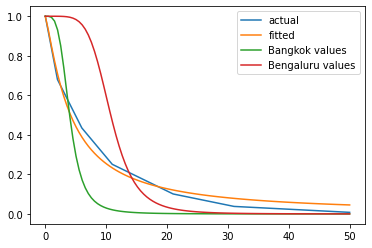

In [7]:
import matplotlib.pyplot as plt
plt.plot(dvals, cumulative_binvals, label="actual")
drange = np.linspace(np.min(dvals), np.max(dvals), num = 100)
fvals = f(drange, *params)
bangkok_vals = f(drange, 4.0, 3.8)
blr_vals = f(drange, 10.751, 5.384)
plt.plot(drange, fvals, label="fitted")
plt.plot(drange, bangkok_vals, label="Bangkok values")
plt.plot(drange, blr_vals, label="Bengaluru values")
plt.legend();

The parameter $(a, b)$ computed from this are therefore given by:

In [8]:
print(f"[a, b] = {params}.")

[a, b] = [4.15299381 1.22367266].
